In [1]:
# Create a practice set of random latitude and longitude combinations.
lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
lat_lngs = zip(lats,lngs)

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [10]:
# Use the print() function to display the latitude and longitude combinations. 
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

34.778249677017186 153.2496470202991
10.047742803849147 -45.1903466705584
-23.37733803773709 -21.590891881099083
-87.55456248231505 142.28719120575113
11.447990899128584 -161.65553864692282
-67.29871584301894 45.52806742411457
-75.87573343161888 39.05551482267575
44.49353095431894 -146.45932667698187
-38.85993332136349 117.58750495689213
23.38406876284533 117.05299182496111
-43.23635885875033 22.841343182331258
34.46423359544643 36.58319032180796
-25.30305952735806 -126.15830237124675
-64.88480359040464 3.476266913055639
50.156813650300506 18.516806482852616
72.76160021178904 -89.47384757675229
-56.886753294116794 85.61545240269248
62.17195488473021 117.39552722286385
0.973882733843638 -78.85872759179465
-43.4002139911815 97.40509236664411
34.089400235457475 53.367089429478796
82.90240280454975 -62.657429496128955
28.041675115827317 -19.51367111167596
9.920071087841947 -94.6336999506293
-45.29040335259297 113.10159893144214
37.73719469872874 -127.26336920966207
-61.15009216400267 29.79

33.56252682454739 54.44371845836923
-41.6150224444809 27.899693312835865
-71.303709689181 -144.51550167875905
77.9271430092231 57.14212674847565
-59.29179707550338 -91.91127747991621
0.1015639769983494 100.3429002662117
22.718394968996478 -70.37823054988502
61.18404170870738 159.0984236450173
81.65552028211965 159.53999969892442
-44.224360855329806 -122.13998703310504
17.239346656589902 -18.127461942771617
86.17920160367154 -126.59635422818928
30.941449923975256 115.12684693217534
46.424886363248476 109.881343263406
72.92500730551185 -48.91071774191062
-89.64989088071064 59.19594059306095
61.19553596743907 95.47579815499233
-11.147496144599813 6.822610586492829
89.30429199474435 -151.30009974871558
35.471593333227915 -19.576091843827015
4.291754176627762 -70.17452087893615
-27.975699777037413 33.60965906958219
14.47800511574222 -57.64148865985834
11.924087460982378 2.434754311521516
-41.88716444664104 -98.05424484179248
36.84872275037618 12.36794367873884
-88.47390688178795 -35.5075252

In [11]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count. 
len(cities)

631

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for the Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ weather_api_key

In [13]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nemuro
Processing Record 2 of Set 1 | cayenne
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | ewa beach
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | chenghai
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | yabrud
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | rybnik
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | suntar
Processing Record 18 of Set 1 | valdez
Processing Record 19 of Set 1 | ardistan
City not found. Skipping...
Processing Record 20 of Set 1 | narsaq
Processing Record 21 of Set 1 | los llanos de aridane
Processing Record 22 of Set 1 | champerico
Processing Reco

Processing Record 35 of Set 4 | beira
Processing Record 36 of Set 4 | yellowknife
Processing Record 37 of Set 4 | khani
Processing Record 38 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 39 of Set 4 | linfen
Processing Record 40 of Set 4 | romitan
Processing Record 41 of Set 4 | sistranda
Processing Record 42 of Set 4 | jensen beach
Processing Record 43 of Set 4 | kandrian
Processing Record 44 of Set 4 | bengkulu
Processing Record 45 of Set 4 | hamilton
Processing Record 46 of Set 4 | jacqueville
Processing Record 47 of Set 4 | san juan de los lagos
Processing Record 48 of Set 4 | yenagoa
Processing Record 49 of Set 4 | kajaani
Processing Record 50 of Set 4 | bluff
Processing Record 1 of Set 5 | conde
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | kaitangata
Processing Record 5 of Set 5 | marystown
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | yeppoon
Processing Record 8 of Set 5

Processing Record 26 of Set 8 | mount hagen
Processing Record 27 of Set 8 | tocopilla
Processing Record 28 of Set 8 | mayumba
Processing Record 29 of Set 8 | ntoum
Processing Record 30 of Set 8 | eldikan
City not found. Skipping...
Processing Record 31 of Set 8 | port hardy
Processing Record 32 of Set 8 | te anau
Processing Record 33 of Set 8 | tezu
Processing Record 34 of Set 8 | tigzirt
Processing Record 35 of Set 8 | lorengau
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | longyearbyen
Processing Record 38 of Set 8 | qaqortoq
Processing Record 39 of Set 8 | sri aman
Processing Record 40 of Set 8 | reshetnikovo
Processing Record 41 of Set 8 | vanavara
Processing Record 42 of Set 8 | do gonbadan
Processing Record 43 of Set 8 | high level
Processing Record 44 of Set 8 | khabary
Processing Record 45 of Set 8 | dubai
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | halifax
Processing Record 48 of Set 8 | osorno
Processing Record 49 of

Processing Record 13 of Set 12 | usinsk
Processing Record 14 of Set 12 | fayaoue
Processing Record 15 of Set 12 | guanica
Processing Record 16 of Set 12 | oyama
Processing Record 17 of Set 12 | acapulco
Processing Record 18 of Set 12 | xai-xai
Processing Record 19 of Set 12 | sumbe
Processing Record 20 of Set 12 | vangaindrano
Processing Record 21 of Set 12 | el dorado
Processing Record 22 of Set 12 | progreso
Processing Record 23 of Set 12 | meulaboh
Processing Record 24 of Set 12 | bani
Processing Record 25 of Set 12 | linhares
Processing Record 26 of Set 12 | cam ranh
Processing Record 27 of Set 12 | kiama
Processing Record 28 of Set 12 | boromo
Processing Record 29 of Set 12 | eixo
Processing Record 30 of Set 12 | bridlington
Processing Record 31 of Set 12 | laela
Processing Record 32 of Set 12 | samusu
City not found. Skipping...
Processing Record 33 of Set 12 | sur
Processing Record 34 of Set 12 | merrill
Processing Record 35 of Set 12 | anloga
Processing Record 36 of Set 12 | wa

In [15]:
len(city_data)

574

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nemuro,43.3236,145.5750,66.11,94,99,8.84,JP,2022-07-29 21:42:56
1,Cayenne,4.9333,-52.3333,82.09,1,75,1.14,GF,2022-07-29 21:42:25
2,Georgetown,5.4112,100.3354,82.33,95,20,5.75,MY,2022-07-29 21:38:05
3,Hobart,-42.8794,147.3294,40.05,83,20,5.75,AU,2022-07-29 21:40:20
4,Ewa Beach,21.3156,-158.0072,85.37,54,40,6.91,US,2022-07-29 21:42:56


In [17]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nemuro,JP,2022-07-29 21:42:56,43.3236,145.5750,66.11,94,99,8.84
1,Cayenne,GF,2022-07-29 21:42:25,4.9333,-52.3333,82.09,1,75,1.14
2,Georgetown,MY,2022-07-29 21:38:05,5.4112,100.3354,82.33,95,20,5.75
3,Hobart,AU,2022-07-29 21:40:20,-42.8794,147.3294,40.05,83,20,5.75
4,Ewa Beach,US,2022-07-29 21:42:56,21.3156,-158.0072,85.37,54,40,6.91


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Creating a scatter plot. Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

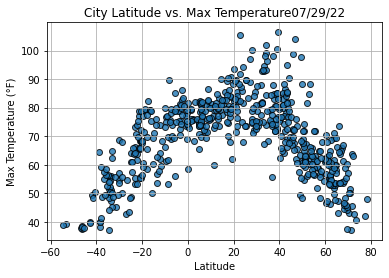

In [20]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

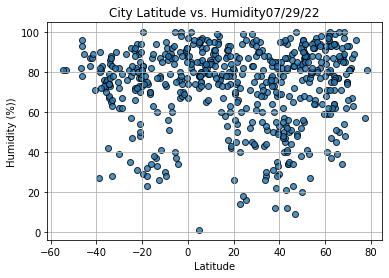

In [21]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity" + time.strftime("%x"))
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

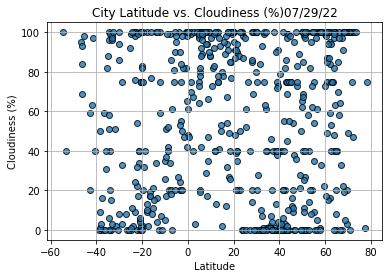

In [22]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%)" + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

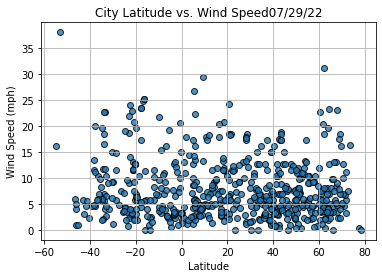

In [23]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save Figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
# Import linregress.
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and 
# the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y. values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values,"r")
    
    # Annotate the text for the line equation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                       Rybnik
Country                        PL
Date          2022-07-29 21:42:25
Lat                       50.0971
Lng                       18.5418
Max Temp                    67.33
Humidity                       92
Cloudiness                     69
Wind Speed                   5.01
Name: 13, dtype: object

In [26]:
# Create Northern and Souther Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]< 0)]

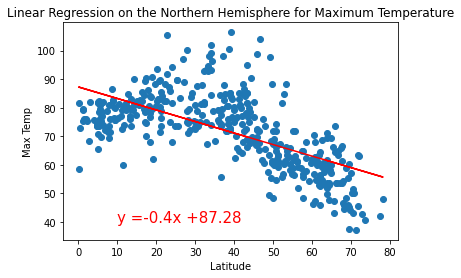

In [27]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                      'Max Temp', (10,40))

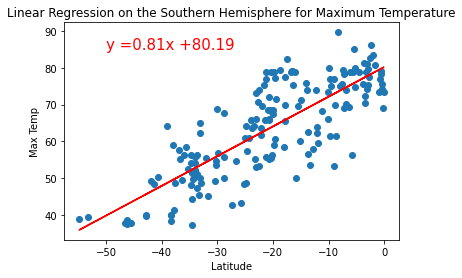

In [29]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                      'Max Temp', (-50,85))

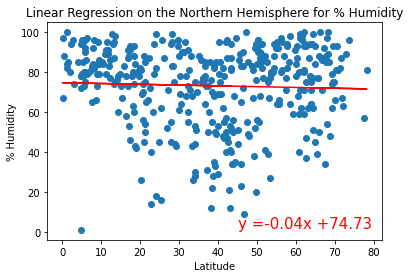

In [33]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                      '% Humidity', (45,2))

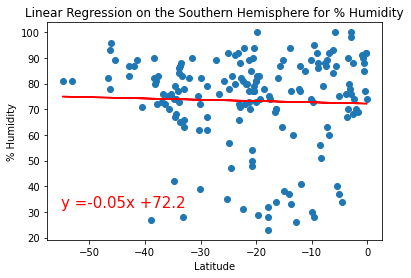

In [37]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity',
                      '% Humidity', (-55,32))

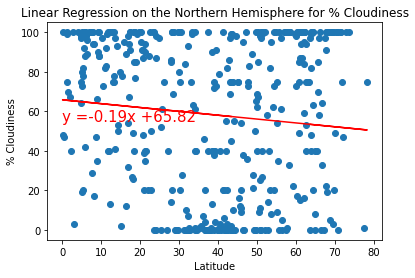

In [41]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                      '% Cloudiness', (0,55))

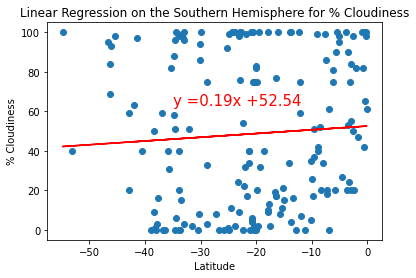

In [46]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                      '% Cloudiness', (-35,63))

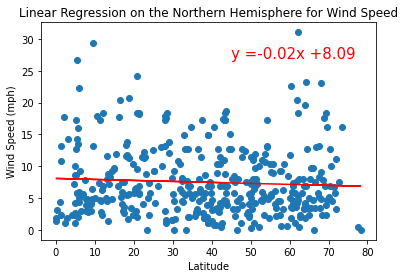

In [48]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed', 
                      'Wind Speed (mph)', (45,27))

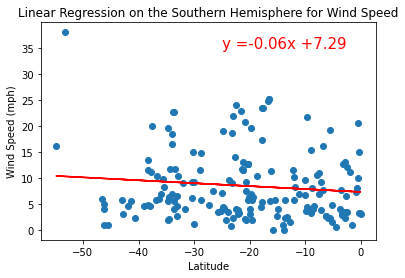

In [50]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed (mph)', (-25,35))